In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [12]:

image_path = r"C:\Users\owner\Desktop\Projects\Football\output\cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image)

[[[ 93 130  27]
  [ 93 129  29]
  [ 94 128  31]
  ...
  [ 95 130  30]
  [ 95 129  32]
  [ 95 129  32]]

 [[ 92 128  28]
  [ 92 128  28]
  [ 93 127  30]
  ...
  [ 95 130  30]
  [ 95 129  32]
  [ 95 129  32]]

 [[ 93 127  30]
  [ 93 127  30]
  [ 93 127  32]
  ...
  [ 94 129  29]
  [ 94 128  31]
  [ 95 129  32]]

 ...

 [[ 84 116  31]
  [ 84 116  31]
  [ 84 116  31]
  ...
  [ 70 104  17]
  [ 65 100   8]
  [ 64  99   5]]

 [[ 86 118  33]
  [ 86 118  33]
  [ 86 118  33]
  ...
  [ 79 114  22]
  [ 82 117  23]
  [ 82 117  23]]

 [[ 87 119  34]
  [ 87 119  34]
  [ 87 119  34]
  ...
  [ 87 122  30]
  [ 92 127  33]
  [ 93 128  34]]]


In [13]:
image.shape

(89, 54, 3)

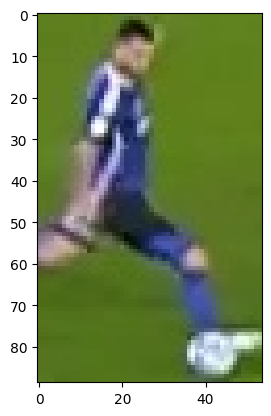

In [9]:
plt.imshow(image)
plt.show()

# take the top half of the image

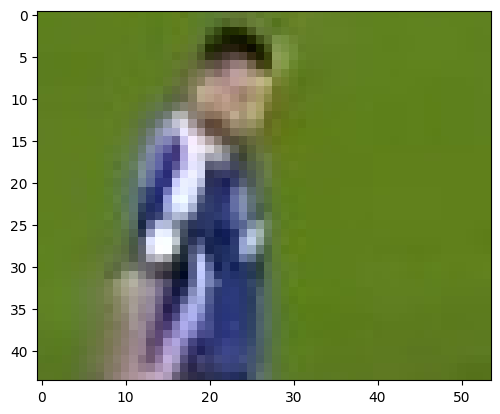

In [10]:
top_half_image=  image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into two clusters

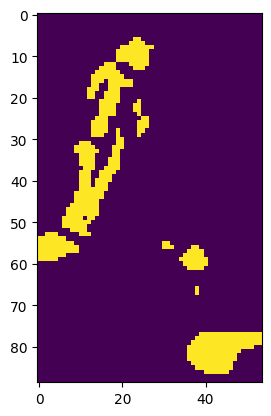

In [16]:
# Reshape the image into 2d array
image_2d = image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the orginal image shape
clustered_image = labels.reshape(image.shape[0], image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [19]:
print(set(labels))

{0, 1}


In [9]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [10]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [11]:
kmeans.cluster_centers_[player_cluster]

array([171.38378378, 235.65405405, 142.8472973 ])